<a href="https://colab.research.google.com/github/Highashikata/Data-Analytics---Financial-Data-Analysis/blob/main/Data_Analytics_Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysing Yahoo Finance Data**

In this project, we will be exploring the Yahoo finance Data to analyse it using a bunch of tools in Python, DataFrames, DataReader and obviously Data Science Libraries Pandas, Seaborn, Matplotlib ...

In [1]:
### Importing useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In this project, we will procede by downloading the Financial Data of Apple from Yahoo Finance to our computer as a CSV file.

Since, I prefer to work with Colab, I will download directly the Data CSV file to colab to work with it afterword.

In [2]:
#### Importing the data to google colab
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [3]:
### Reading the Data with Pandas
data = pd.read_csv("AAPL.csv")

display("The Shape of the DataSet is {}".format(data.shape), data.head())

'The Shape of the DataSet is (252, 7)'

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200


In [4]:
### Copying the Data in order to keep the original data frame
df = data.copy()

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600
248,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300
249,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.380005,62348900
250,2021-12-30,179.470001,180.570007,178.089996,178.199997,178.199997,59773000
251,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.570007,64025500


**A little EDA - Exploratory Data Analysis**

In [5]:
### Exploring the Data Types of the attributes
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
### Cheking for any missing data 
display(df.isnull().sum())

display(df.isnull().isna().any())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
### Checking for the index of the DataFrame
df.index


RangeIndex(start=0, stop=252, step=1)

In [8]:
### We will reset the index to the Date Column
# method 1 : df = pd.read_csv('AAPL.csv', index_colunm = 0)

# method 2 : Setting a specified index using the dataframe column
# df.set_index('Date', inplace = True)

**Tip** : once the set_index line is executed, it must be commented out, so that when you restart the jupyter kernel, you won't get an error.

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200


In [10]:
### Manipulating the DATA 
# df.columns

# for i in range(10):
#   print(df.iloc[i], '\n')

# for volume in df.Volume:
#   print(df.loc[volume])

In [11]:
type(df.index)
df.index[0]

0

In [12]:
### Data Pre-processing
## Determining the Unique Values in the Dataset

for column in df:
  unique_values = np.unique(df[column])
  nbr_values = len(unique_values)
  if nbr_values < 36:
    print('The Number of Values for the Feature {} : {} ---- {}'.format(column, unique_values, nbr_values))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, nbr_values))

The Number of values for the Feature Date : 252
The Number of values for the Feature Open : 245
The Number of values for the Feature High : 245
The Number of values for the Feature Low : 247
The Number of values for the Feature Close : 246
The Number of values for the Feature Adj Close : 250
The Number of values for the Feature Volume : 252


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

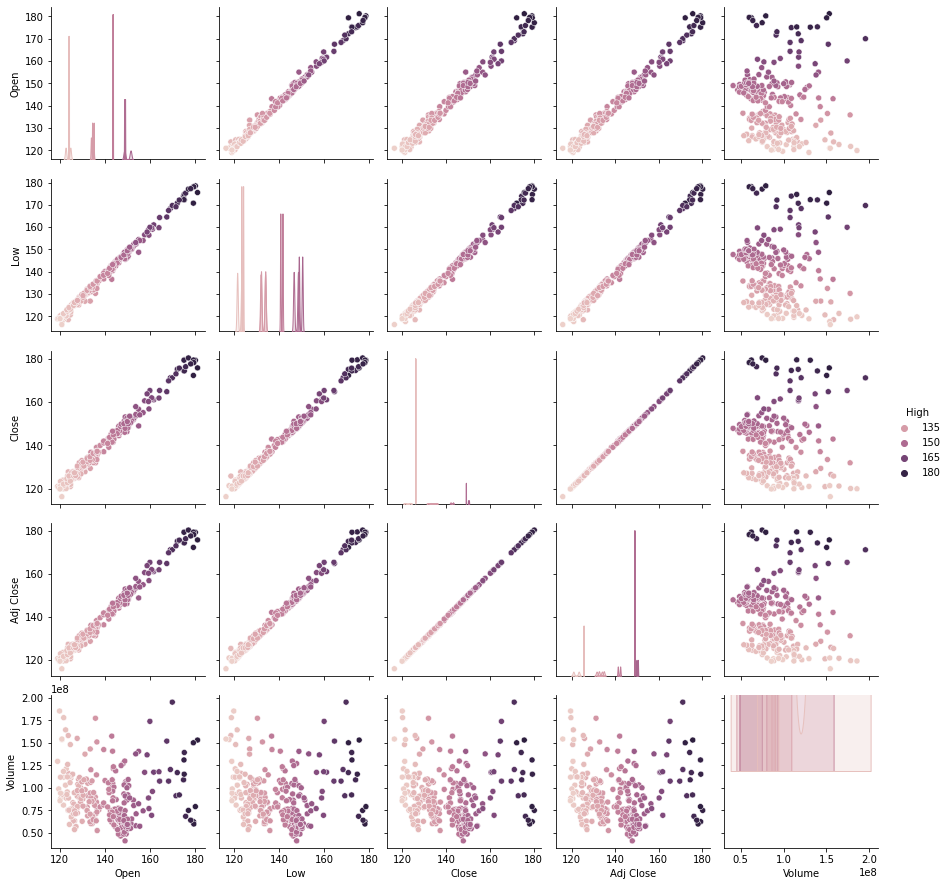

In [13]:
#### Visualizing the Numerical Data using the seaborn lib
sns.pairplot(df, hue = 'High', diag_kws = {'bw': 0.2})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

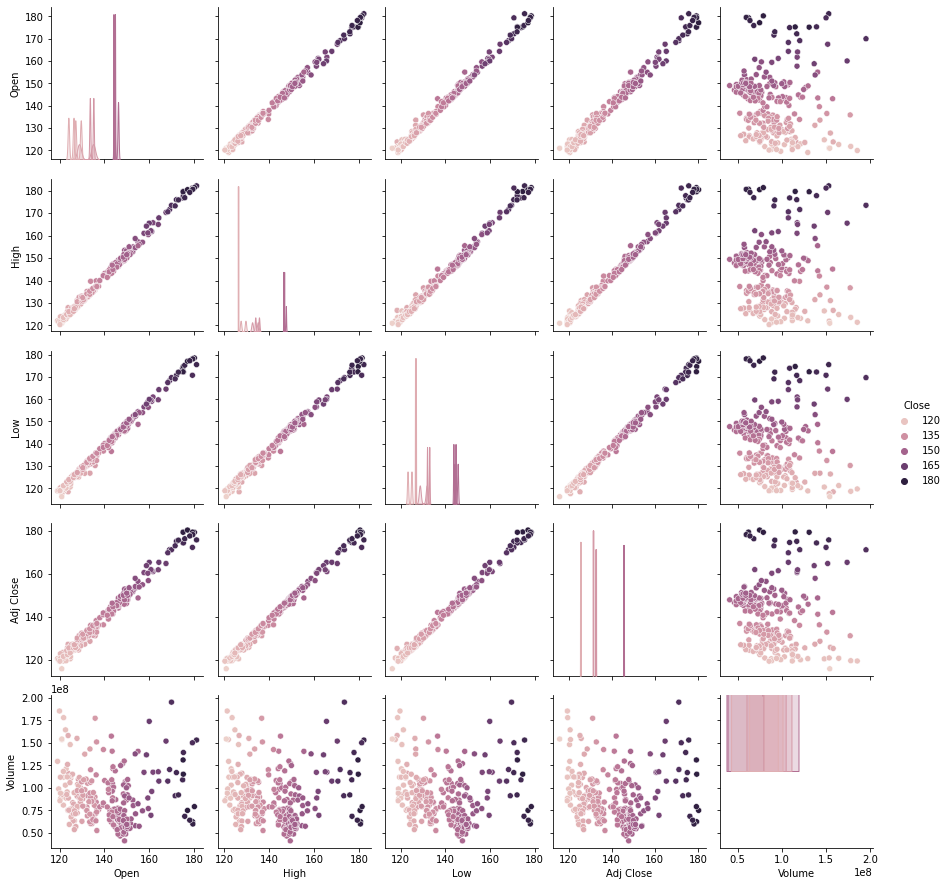

In [14]:
#### Visualizing the Numerical Data using the seaborn lib
sns.pairplot(df, hue = 'Close', diag_kws = {'bw': 0.2})

In [15]:
### Describing the Data Statisticaly
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,140.861866,142.347818,139.474087,140.989365,140.612221,9.051687e+07
std,14.493334,14.755514,14.446238,14.659580,14.841203,2.919991e+07
min,119.029999,120.400002,116.209999,116.360001,115.819870,4.100000e+07
25%,128.774998,130.434998,127.114998,128.962498,128.172348,6.897910e+07
50%,140.655006,142.225006,138.739998,141.305001,141.046974,8.563055e+07
75%,148.855007,149.857502,147.684994,148.962506,148.682220,1.067201e+08
max,181.119995,182.130005,178.529999,180.330002,180.330002,1.954327e+08


In [16]:
#### Checking the Correlation
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.996994,0.995945,0.991868,0.991847,-0.042374
High,0.996994,1.000000,0.995480,0.996029,0.995914,-0.013118
Low,0.995945,0.995480,1.000000,0.995961,0.996091,-0.085620
Close,0.991868,0.996029,0.995961,1.000000,0.999941,-0.055423
Adj Close,0.991847,0.995914,0.996091,0.999941,1.000000,-0.058113
Volume,-0.042374,-0.013118,-0.085620,-0.055423,-0.058113,1.000000


In [19]:
#### Doing some calculations with the columns
# price_daily_change = df['Open'] - df['Close']
# list_percent_price_daily_change = percent_price_daily_change.tolist()

# percent_price_daily_change = (df['Open'] - df['Close'])/df['Close']*100
# list_percent_price_daily_change = percent_price_daily_change.tolist()


# display(list_percent_price_daily_change)

In [20]:
### Adding the new columns to the original Data Frame

# df.insert(loc = 1, column = 'price_daily_change', value = list_percent_price_daily_change)
# df.insert(loc = 1, column = 'Percent_Daily_Change', value = list_percent_price_daily_change)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200


In [21]:
#### Renaming the added columns cuz it looks ugly :p

# df = df.rename(columns = {'Percent_Daily_Change' : '%Daily_Chgt', 'price_daily_change': '$Daily_Chgt'})
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200


In [22]:
### Normalize Data
norm = df['Close']/df['Close'].iloc[0]

display(norm, type(norm))

0      1.000000
1      1.012364
2      0.978286
3      1.011668
4      1.020400
         ...   
247    1.393478
248    1.385442
249    1.386137
250    1.377019
251    1.372151
Name: Close, Length: 252, dtype: float64

pandas.core.series.Series

In [23]:
#### Inserting new columns
df['Daily Chg'] = df['Close'] - df['Open']
df['Normalized'] = df['Close']/df['Close'].iloc[0]

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Chg,Normalized
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900,-4.110000,1.000000
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900,2.119996,1.012364
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000,-1.120003,0.978286
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200,2.559997,1.011668
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200,-0.379990,1.020400


In [24]:
  df.iloc[:10]

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Chg,Normalized
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900,-4.110000,1.000000
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900,2.119996,1.012364
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000,-1.120003,0.978286
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200,2.559997,1.011668
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200,-0.379990,1.020400
5,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.189743,100384500,-0.210006,0.996677
6,2021-01-12,128.500000,129.690002,126.860001,128.800003,128.010864,91951100,0.300003,0.995286
7,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.088043,88636800,2.130004,1.011436
8,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.120163,90221800,-1.889999,0.996136
9,2021-01-15,128.779999,130.220001,127.000000,127.139999,126.361008,111598500,-1.640000,0.982459


In [25]:
df['Open'].iloc[220:230].mean()

157.4779998

In [26]:
#### Dropping unused columns
# df.drop(labels = ['%Daily_Chgt', '$Daily_Chgt', 'Adj Close', 'Volume'], axis = 1, inplace = True)

KeyError: ignored

In [28]:
# df.set_index('Date')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Chg,Normalized
247,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600,3.240006,1.393478
248,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300,-0.870011,1.385442
249,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.380005,62348900,0.050003,1.386137
250,2021-12-30,179.470001,180.570007,178.089996,178.199997,178.199997,59773000,-1.270004,1.377019
251,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.570007,64025500,-0.519989,1.372151


In [29]:
display(df.loc[10: 19], df.iloc[10:19])

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Chg,Normalized
10,2021-01-19,127.779999,128.710007,126.940002,127.830002,127.046791,90757300,0.050003,0.987791
11,2021-01-20,128.660004,132.490005,128.550003,132.029999,131.221039,104319500,3.369995,1.020246
12,2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900,3.069992,1.057646
13,2021-01-22,136.279999,139.850006,135.020004,139.070007,138.217911,114459400,2.790008,1.074646
14,2021-01-25,143.070007,145.089996,136.539993,142.919998,142.044327,157611700,-0.150009,1.104397
15,2021-01-26,143.600006,144.300003,141.369995,143.160004,142.282867,98390600,-0.440002,1.106251
16,2021-01-27,143.429993,144.300003,140.410004,142.059998,141.189590,140843800,-1.369995,1.097751
17,2021-01-28,139.520004,141.990005,136.699997,137.089996,136.250046,142621100,-2.430008,1.059346
18,2021-01-29,135.830002,136.740005,130.210007,131.960007,131.151474,177523800,-3.869995,1.019705
19,2021-02-01,133.750000,135.380005,130.929993,134.139999,133.318115,106239800,0.389999,1.036550


,Date,Open,High,Low,Close,Adj Close,Volume,Daily Chg,Normalized
10,2021-01-19,127.779999,128.710007,126.940002,127.830002,127.046791,90757300,0.050003,0.987791
11,2021-01-20,128.660004,132.490005,128.550003,132.029999,131.221039,104319500,3.369995,1.020246
12,2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900,3.069992,1.057646
13,2021-01-22,136.279999,139.850006,135.020004,139.070007,138.217911,114459400,2.790008,1.074646
14,2021-01-25,143.070007,145.089996,136.539993,142.919998,142.044327,157611700,-0.150009,1.104397
15,2021-01-26,143.600006,144.300003,141.369995,143.160004,142.282867,98390600,-0.440002,1.106251
16,2021-01-27,143.429993,144.300003,140.410004,142.059998,141.189590,140843800,-1.369995,1.097751
17,2021-01-28,139.520004,141.990005,136.699997,137.089996,136.250046,142621100,-2.430008,1.059346
18,2021-01-29,135.830002,136.740005,130.210007,131.960007,131.151474,177523800,-3.869995,1.019705


In [30]:
df.loc[15:30, ['Open', 'Close', 'Daily Chg']]

,Open,Close,Daily Chg
15,143.600006,143.160004,-0.440002
16,143.429993,142.059998,-1.369995
17,139.520004,137.089996,-2.430008
18,135.830002,131.960007,-3.869995
19,133.750000,134.139999,0.389999
20,135.729996,134.990005,-0.739991
21,135.759995,133.940002,-1.819993
22,136.300003,137.389999,1.089996
23,137.350006,136.759995,-0.590011
24,136.029999,136.910004,0.880005


In [31]:
df.iloc[15:31, [1, 4, 5]]

,Open,Close,Adj Close
15,143.600006,143.160004,142.282867
16,143.429993,142.059998,141.189590
17,139.520004,137.089996,136.250046
18,135.830002,131.960007,131.151474
19,133.750000,134.139999,133.318115
20,135.729996,134.990005,134.162918
21,135.759995,133.940002,133.119339
22,136.300003,137.389999,136.548203
23,137.350006,136.759995,136.125183
24,136.029999,136.910004,136.274475


**Visualizing the Financial Data** using Matplotlib library

In [39]:
df.set_index('Date', inplace = True)

In [40]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Chg,Normalized
Date,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900,-4.110000,1.000000
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900,2.119996,1.012364
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000,-1.120003,0.978286
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200,2.559997,1.011668
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200,-0.379990,1.020400


In [47]:
%matplotlib inline

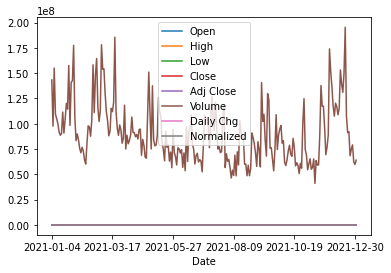

In [48]:
df.plot()

Text(0.5, 1.0, 'AAPL Stock Price')

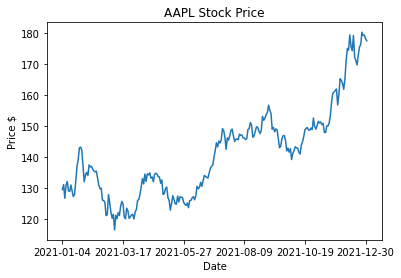

In [50]:
### OOP way of plotting figures
fig, axis = plt.subplots()
df['Close'].plot(ax = axis)

# Configuring the plot
axis.set_xlabel("Date")
axis.set_ylabel("Price $")
axis.set_title("AAPL Stock Price")

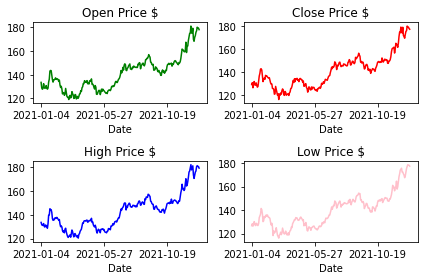

In [67]:
fig, axis = plt.subplots(2, 2)
df['Open'].plot(ax = axis[0, 0], title = 'Open Price $', c ='g')
df['Close'].plot(ax = axis[0, 1], title = 'Close Price $', c = 'r')
df['High'].plot(ax = axis[1, 0], title = 'High Price $', c = 'b')
df['Low'].plot(ax = axis[1, 1], title = 'Low Price $', c = 'pink')
plt.tight_layout()



In [76]:
# ### Using the Bar plot
# fig, axis = plt.subplots()
# df['Volume'].loc['2020-11-16': '2020-12-31'].plot.bar(ax = axis)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Chg',
       'Normalized'],
      dtype='object')

**Using the Pandas DataReader**

In [77]:
import pandas_datareader as pdr


In [79]:
# # DataReader installation
# !pip install pandas_datareader

In [80]:
import datetime as dt


In [86]:
ticker = "AAPL"
start = dt.datetime(2018, 1, 1)

df2 = pdr.get_data_yahoo(ticker, start)

RemoteDataError: ignored

In [83]:
df2.head()

NameError: ignored

In [85]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
